## 특성 공학과 규제

**<span style="color:red">다중 선형 회귀</span>**는 여러 개의 독립 변수와 하나의 종속 변수의 선형 관계를 모델링<br>
y=W1x1 + W2x2 + ... + Wnxn + b<br><br>
(가정)<br><br>
**1. 각각의 독립 변수는 종속 변수와의 선형 관계가 존재함<br>
2. 독립 변수 사이에는 높은 수준의 상관관계가 존재하지 않아야 함 (관계 분석하기 어려움)<br>
3. 잔차(추정 종속 변수 값과 실제 종속 변수 값 차이)가 정규 분포를 이루어야 함**

### 데이터 준비

In [3]:
import pandas as pd

In [4]:
#길이, 높이, 너비
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [5]:
import numpy as np

In [6]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [7]:
print(perch_full.shape)
print(perch_weight.shape)

(56, 3)
(56,)


In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight,random_state=42)

In [9]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_input.shape)

(42, 3)
(14, 3)
(42,)
(14, 3)


In [10]:
print(train_input[0])
print(train_target[0])

[19.6   5.14  3.04]
85.0


### 사이킷런의 변환기

**변환기는 데이터셋을 만들거나 변환하거나 전처리하는 역할 수행**<br>
**<span style="color:blue">fit() : </span>** 새롭게 만들 특성 조합 찾음, 입력 데이터만 전달<br>
**<span style="color:blue">transform() : </span>** 데이터 변환<br><br>
**<span style="color:blue">PolynomialFeatures</span>** 클래스는 **입력 데이터 x를 [1,x,x^2,x^3,...]과 같이 여러 다항식으로 변환<br>**
<U>차수를 결정하는</U> **degree**와 <U>상수항 생성 여부를 결정하는</U> **include_bias**를 매개변수로 갖음

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [13]:
#사이킷런 선형 모델은 자동으로 절편 추가하므로 상수항 필요 없어서 False로 설정
#degree는 기본값이 2
poly = PolynomialFeatures(include_bias=False) 
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [14]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [15]:
print(train_poly.shape) #3개의 샘플(길이, 높이, 너비)이 9개로 변환됨

(42, 9)


In [16]:
poly.get_feature_names_out() #9개 특성의 입력 조합을 알려줌

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [17]:
test_poly=poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [18]:
#과소 적합 문제는 해결, 특성이 늘어나면 선형 회귀의 능력이 강해진다는 것을 알 수 있음
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594155


In [19]:
poly = PolynomialFeatures(degree=5,include_bias=False) # degree를 5로 높임
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape) #특성이 55개로 늘어남

(42, 55)


In [20]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))#거의 완벽한 점수
print(lr.score(test_poly, test_target))#특성의 개수를 늘리면 너무 훈련 셋에 과대 적합되어 테스트 셋에서는 매우 낮은 점수 얻게 됨

0.9999999999938143
-144.40744532797535


### 규제

머신러닝 모델이 훈련세트를 너무 **과도하게 학습하지 못하도록** 훼방하는 것<br>
선형 회귀 모델의 경우 특성에 곱해지는 <U>계수(또는 기울기)를 작게 만드는 일</U>을 함<br><br>
계수 값의 크기가 많이 다르면 공정하게 제어가 되지 않음 그래서 **<span style="color:blue">StandardScaler</span>** 클래스를 이용하여 **정규화**를 실행함<br>
StandardScaler 클래스는 평균 0, 분산 1이 되도록 정규화 시켜줌(동일한 기준이 적용되어야 하므로 테스트 세트까지 변환해야함)

In [21]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly)

train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

### 릿지

계수를 제곱한 값을 기준으로 규제를 적용<br>

In [22]:
#훈련 셋 점수는 낮아졌지만 테스트 점수를 통해 너무 과대적합되지 않았다는 것을 알 수 있음
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(train_scaled,train_target)
print('훈련점수 = ',ridge.score(train_scaled,train_target))
print('테스트점수 = ',ridge.score(test_scaled,test_target))

훈련점수 =  0.9896101671037343
테스트점수 =  0.979069397761538


In [23]:
import matplotlib.pyplot as plt

train_score=[]
test_score=[]

#### 하이퍼 파라미터<br>
* 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터<br>
* 여기서 alpha가 해당됨

In [24]:
alpha_list=[0.001,0.01,0.1,1,10,100] #규제 강도 조절, alpha 값이 클수록 규제 강도가 세서 조금 더 과소적합되도록 유도
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled, test_target))

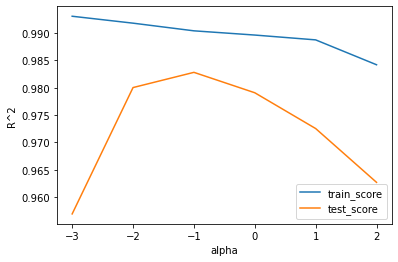

In [25]:
plt.plot(np.log10(alpha_list),train_score)#alpha 값을 10배씩 늘렸기 때문에 동일한 간격으로 나타내기 위해 log함수 사용
plt.plot(np.log10(alpha_list),test_score)
plt.legend(['train_score','test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [26]:
ridge=Ridge(alpha=0.1)#위 그래프에서 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 alpha 값이 0.1임
ridge.fit(train_scaled,train_target)

#훈련 세트 테스트 세트 비슷하게 점수가 높고 과대적합과 과소적합 사이에 균형을 맞추고 있음
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570368
0.9827976465386863


### 라쏘

계수의 절댓값을 기준으로 규제 적용

In [27]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [28]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [30]:
prevalue=lasso.predict(train_scaled[:3])
print(prevalue)
print(train_target[:3])

prevalue=lasso.predict(test_scaled[:3])
print(prevalue)
print(test_target[:3])

[ 89.7043722  133.00659968  84.48968511]
[ 85. 135.  78.]
[-17.58278429  83.26753163 257.45894521]
[  5.9 100.  250. ]


In [31]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\20\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\20\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


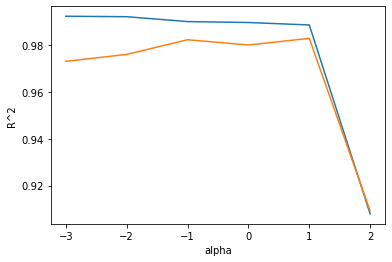

In [32]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [33]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [34]:
print(np.sum(lasso.coef_ == 0)) #계수 0 = 해당 계수를 사용하지 않음, 유용한 특징을 어느정도로 골라냈는 지 척도로 사용

40
